In [29]:
import requests as rq
import pandas as pd
import numpy as np
import re

In [30]:
base_urls = rq.get('https://swapi.dev/api/').json()
base_urls
def getAllResponse(url):
    data_response = rq.get(url).json()
    data = []
    data+=data_response['results']

    while(data_response['next'] != None):
        data_response = rq.get(data_response['next']).json()
        data+=data_response['results']
    data = pd.DataFrame(data)   
    return data
    

In [31]:
def cleanColumns(columns, data):
    for column in columns:
        data[column] = data[column].map(lambda x :  [re.findall(r'\d+', url)[0] for url in x])

In [32]:
base_urls

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

In [33]:
people = getAllResponse(base_urls['people'])
films = getAllResponse(base_urls['films'])
vehicles = getAllResponse(base_urls['vehicles'])
starships = getAllResponse(base_urls['starships'])
species = getAllResponse(base_urls['species'])
planets = getAllResponse(base_urls['planets'])



In [34]:

people_columns_to_clean = ['films', 'species', 'vehicles', 'starships']
cleanColumns(people_columns_to_clean, people)
people['homeworld'] = people['homeworld'].map(lambda x :  re.findall(r'\d+', str(x))[0] if len( re.findall(r'\d+', str(x))) > 0 else None)
people['url'] = people['url'].map(lambda x :  re.findall(r'\d+', x)[0])
people = people.set_index('url')
del people['created']
del people['edited']


In [35]:
films_columns_to_clean = ['characters', 'planets', 'starships','vehicles','species']
cleanColumns(films_columns_to_clean, films)
films['url'] = films['url'].map(lambda x :  re.findall(r'\d+', x)[0])
films = films.set_index('url')
del films['created']
del films['edited']
films.head()

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species
url,,,,,,,,,,,
1,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[1, 2, 3]","[2, 3, 5, 9, 10, 11, 12, 13]","[4, 6, 7, 8]","[1, 2, 3, 4, 5]"
2,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"[1, 2, 3, 4, 5, 10, 13, 14, 18, 20, 21, 22, 23...","[4, 5, 6, 27]","[3, 10, 11, 12, 15, 17, 21, 22, 23]","[8, 14, 16, 18, 19, 20]","[1, 2, 3, 6, 7]"
3,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"[1, 2, 3, 4, 5, 10, 13, 14, 16, 18, 20, 21, 22...","[1, 5, 7, 8, 9]","[2, 3, 10, 11, 12, 15, 17, 22, 23, 27, 28, 29]","[8, 16, 18, 19, 24, 25, 26, 30]","[1, 2, 3, 5, 6, 8, 9, 10, 15]"
4,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"[2, 3, 10, 11, 16, 20, 21, 32, 33, 34, 35, 36,...","[1, 8, 9]","[31, 32, 39, 40, 41]","[33, 34, 35, 36, 37, 38, 42]","[1, 2, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, ..."
5,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"[2, 3, 6, 7, 10, 11, 20, 21, 22, 33, 35, 36, 4...","[1, 8, 9, 10, 11]","[21, 32, 39, 43, 47, 48, 49, 52, 58]","[4, 44, 45, 46, 50, 51, 53, 54, 55, 56, 57]","[1, 2, 6, 12, 13, 15, 28, 29, 30, 31, 32, 33, ..."


In [36]:
vehicles_columns_to_clean = ['pilots', 'films']
cleanColumns(vehicles_columns_to_clean, vehicles)
vehicles['url'] = vehicles['url'].map(lambda x :  re.findall(r'\d+', x)[0])
vehicles = vehicles.set_index('url')
del vehicles['created']
del vehicles['edited']
vehicles.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films
url,,,,,,,,,,,,,
4,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[1, 5]"
6,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[1]
7,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[1]
8,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[1, 2, 3]"
14,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[1, 18]",[2]


In [37]:
starships_columns_to_clean = ['pilots', 'films']
cleanColumns(starships_columns_to_clean, starships)
starships['url'] = starships['url'].map(lambda x :  re.findall(r'\d+', x)[0])
starships = starships.set_index('url')
del starships['created']
del starships['edited']
starships.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films
url,,,,,,,,,,,,,,,
2,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[1, 3, 6]"
3,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[1, 2, 3]"
5,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[1]
9,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[1]
10,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[13, 14, 25, 31]","[1, 2, 3]"


In [38]:
species_columns_to_clean = ['people', 'films']
cleanColumns(species_columns_to_clean, species)
species['homeworld'] = species['homeworld'].map(lambda x :  re.findall(r'\d+', str(x))[0] if len( re.findall(r'\d+', str(x))) > 0 else None)
species['url'] = species['url'].map(lambda x :  re.findall(r'\d+', x)[0])
species = species.set_index('url')
del species['created']
del species['edited']
species.head()

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films
url,,,,,,,,,,,,
1,Human,mammal,sentient,180,"caucasian, black, asian, hispanic","blonde, brown, black, red","brown, blue, green, hazel, grey, amber",120,9,Galactic Basic,"[66, 67, 68, 74]","[1, 2, 3, 4, 5, 6]"
2,Droid,artificial,sentient,n/a,n/a,n/a,n/a,indefinite,None,n/a,"[2, 3, 8, 23]","[1, 2, 3, 4, 5, 6]"
3,Wookie,mammal,sentient,210,gray,"black, brown","blue, green, yellow, brown, golden, red",400,14,Shyriiwook,"[13, 80]","[1, 2, 3, 6]"
4,Rodian,sentient,reptilian,170,"green, blue",n/a,black,unknown,23,Galatic Basic,[15],[1]
5,Hutt,gastropod,sentient,300,"green, brown, tan",n/a,"yellow, red",1000,24,Huttese,[16],"[1, 3]"


In [39]:
planets_columns_to_clean = ['residents', 'films']
cleanColumns(planets_columns_to_clean, planets)
planets['url'] = planets['url'].map(lambda x :  re.findall(r'\d+', x)[0])
planets = planets.set_index('url')
del planets['created']
del planets['edited']
planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films
url,,,,,,,,,,,
1,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[1, 2, 4, 6, 7, 8, 9, 11, 43, 62]","[1, 3, 4, 5, 6]"
2,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[5, 68, 81]","[1, 6]"
3,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[1]
4,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[2]
5,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[2, 3, 6]"


<AxesSubplot: >

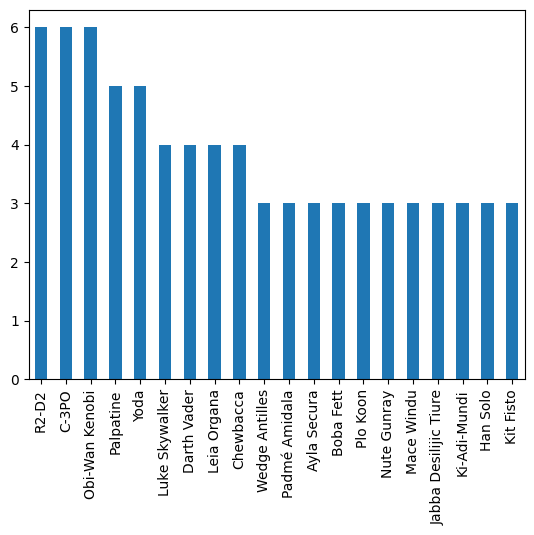

In [40]:
films2= films.explode('characters')
films2 = films2.merge(people[['name']], how='left',left_on='characters',right_on='url')
films2['name'].value_counts().head(20).plot.bar()

In [41]:
del people['films']

del films['vehicles']
del films['starships']
del films['species']


del vehicles['films']
del vehicles['pilots']


del starships['films']
del starships['pilots']

del species['people']
del species['films']


del planets['residents']
del planets['films']

In [42]:
people = people.replace(to_replace='n/a',value=None)
starships = starships.replace(to_replace='n/a',value=None)
planets = planets.replace(to_replace='n/a',value=None)
vehicles = vehicles.replace(to_replace='n/a',value=None)
species = species.replace(to_replace='n/a',value=None)
people = people.replace(to_replace='N/A',value=None)
starships = starships.replace(to_replace='N/A',value=None)
planets = planets.replace(to_replace='N/A',value=None)
vehicles = vehicles.replace(to_replace='N/A',value=None)
species = species.replace(to_replace='N/A',value=None)

In [43]:

people['species'] = people.species.apply(lambda x: None if len(x)==0 else x)
people['vehicles'] = people.vehicles.apply(lambda x: None if len(x)==0 else x)
people['starships'] = people.starships.apply(lambda x: None if len(x)==0 else x)

In [ ]:
starships['cost_in_credits'] = pd.to_numeric(starships['cost_in_credits'], errors='coerce')

<AxesSubplot: >

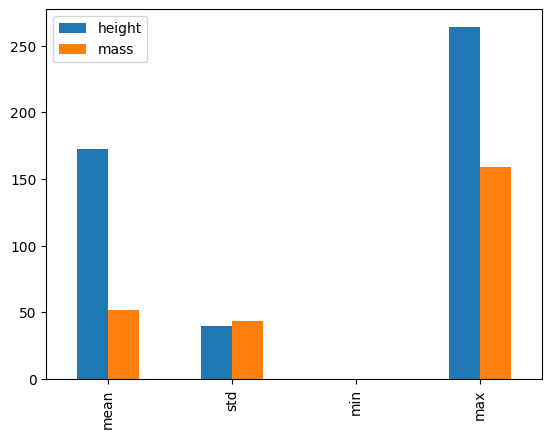

In [69]:
people['height'] = people['height'].apply(lambda x: int(x) if x.isdigit() else 0)
people['mass'] = people['mass'].apply(lambda x: int(x) if x.isdigit() else 0)
people.describe()[['height', 'mass']].loc[['mean', 'std', 'min', 'max']].plot.bar()

In [45]:
films3 = films.explode('characters').merge(people[['name']], how='left',left_on='characters',right_on='url')
films3[films3['name'] == 'C-3PO']


,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,name
1,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,2,"[1, 2, 3]",C-3PO
19,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,2,"[4, 5, 6, 27]",C-3PO
35,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,2,"[1, 5, 7, 8, 9]",C-3PO
54,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,2,"[1, 8, 9]",C-3PO
88,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,2,"[1, 8, 9, 10, 11]",C-3PO
129,Revenge of the Sith,3,War! The Republic is crumbling\r\nunder attack...,George Lucas,Rick McCallum,2005-05-19,2,"[1, 2, 5, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19]",C-3PO


In [71]:
people.explode('starships').merge(starships,left_on='starships', right_on='url').sort_values('cost_in_credits', ascending= False)[['name_x','name_y','cost_in_credits']]

,name_x,name_y,cost_in_credits
10,Obi-Wan Kenobi,Trade Federation cruiser,125000000.0
11,Anakin Skywalker,Trade Federation cruiser,125000000.0
29,Darth Maul,Scimitar,55000000.0
14,Obi-Wan Kenobi,Jedi Interceptor,320000.0
15,Anakin Skywalker,Jedi Interceptor,320000.0
5,Chewbacca,Imperial shuttle,240000.0
6,Han Solo,Imperial shuttle,240000.0
4,Luke Skywalker,Imperial shuttle,240000.0
20,Gregar Typho,Naboo fighter,200000.0
19,Padmé Amidala,Naboo fighter,200000.0


In [72]:
starships[starships['cost_in_credits'] == starships['cost_in_credits'].max()]


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
url,,,,,,,,,,,,,
9,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1.000000e+12,120000,None,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation


In [73]:
starships[starships['cost_in_credits'] == starships['cost_in_credits'].min()]

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
url,,,,,,,,,,,,,
58,Solar Sailer,Punworcca 116-class interstellar sloop,Huppla Pasa Tisc Shipwrights Collective,35700.0,15.2,1600,3,11,240,7 days,1.5,unknown,yacht


In [50]:
# Movies with most visited planets
films4 = films.explode('planets').merge(planets[['name']], how='left',left_on='planets',right_on='url')
films4['title'].value_counts()

Revenge of the Sith        13
Return of the Jedi          5
Attack of the Clones        5
The Empire Strikes Back     4
A New Hope                  3
The Phantom Menace          3
Name: title, dtype: int64

In [51]:
# Most visited planets in movies
films4 = films.explode('planets').merge(planets[['name']], how='left',left_on='planets',right_on='url')
films4['name'].value_counts()

Tatooine          5
Naboo             4
Coruscant         4
Dagobah           3
Alderaan          2
Utapau            1
Cato Neimoidia    1
Felucia           1
Mygeeto           1
Polis Massa       1
Kashyyyk          1
Mustafar          1
Kamino            1
Geonosis          1
Endor             1
Ord Mantell       1
Bespin            1
Hoth              1
Yavin IV          1
Saleucami         1
Name: name, dtype: int64

In [52]:
starships['model'].head()

url
2                       CR90 corvette
3     Imperial I-class Star Destroyer
5        Sentinel-class landing craft
9         DS-1 Orbital Battle Station
10            YT-1300 light freighter
Name: model, dtype: object

<AxesSubplot: >

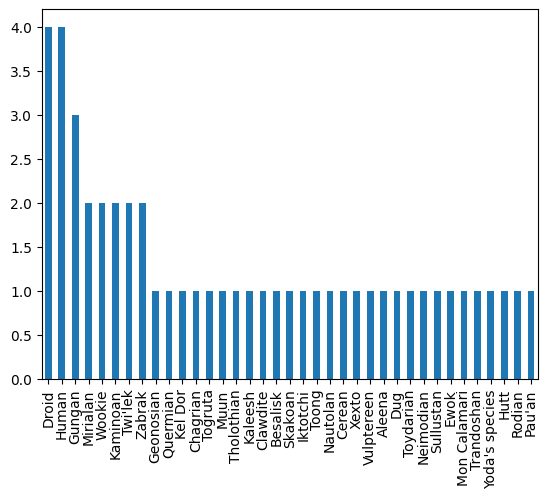

In [77]:
# Relation of characters with their species
people2 = people.explode('species').merge(species[['name']], how='left',left_on='species',right_on='url')
people2['name_y'].value_counts().plot.bar()

In [75]:
# Characters that dont have any species or not known
people2['name_y'].isna().sum()

32